# Optimal Filling a Container

### When a manufactuer ships products, the products are packed in a carton. The size of a carton is assumed to be $\mathcal{l} \times \mathcal{h} \times \mathcal{w}$. To save transportation cost, an order given by a customer often requests container loading (delivery by container). There are several types of container as given in the following table. 

C:\Users\admin\Documents\Python_projects


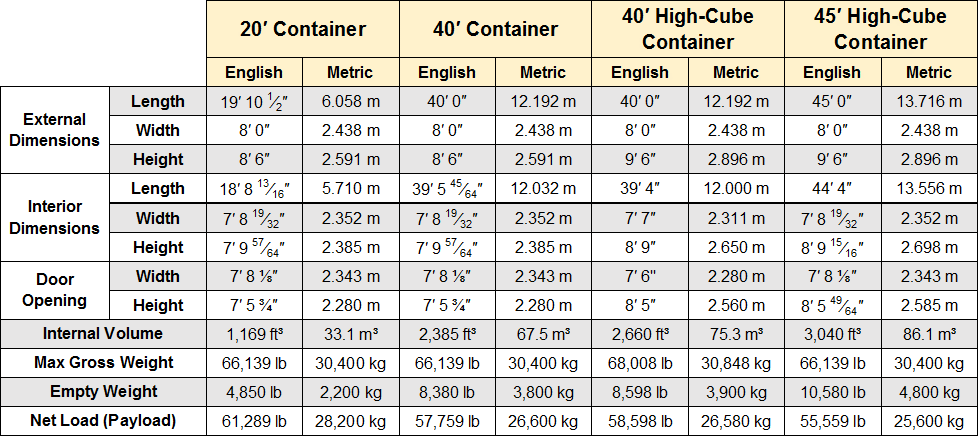

In [2]:
%cd C:\Users\admin\Documents\Python_projects
from IPython.display import Image
Image(filename='Container_types.png')

### The objective here is to find an optimal arrangement of cartons to put inside the given container so that the number of cartons is maximized.

### Illustration of a Container and a carton

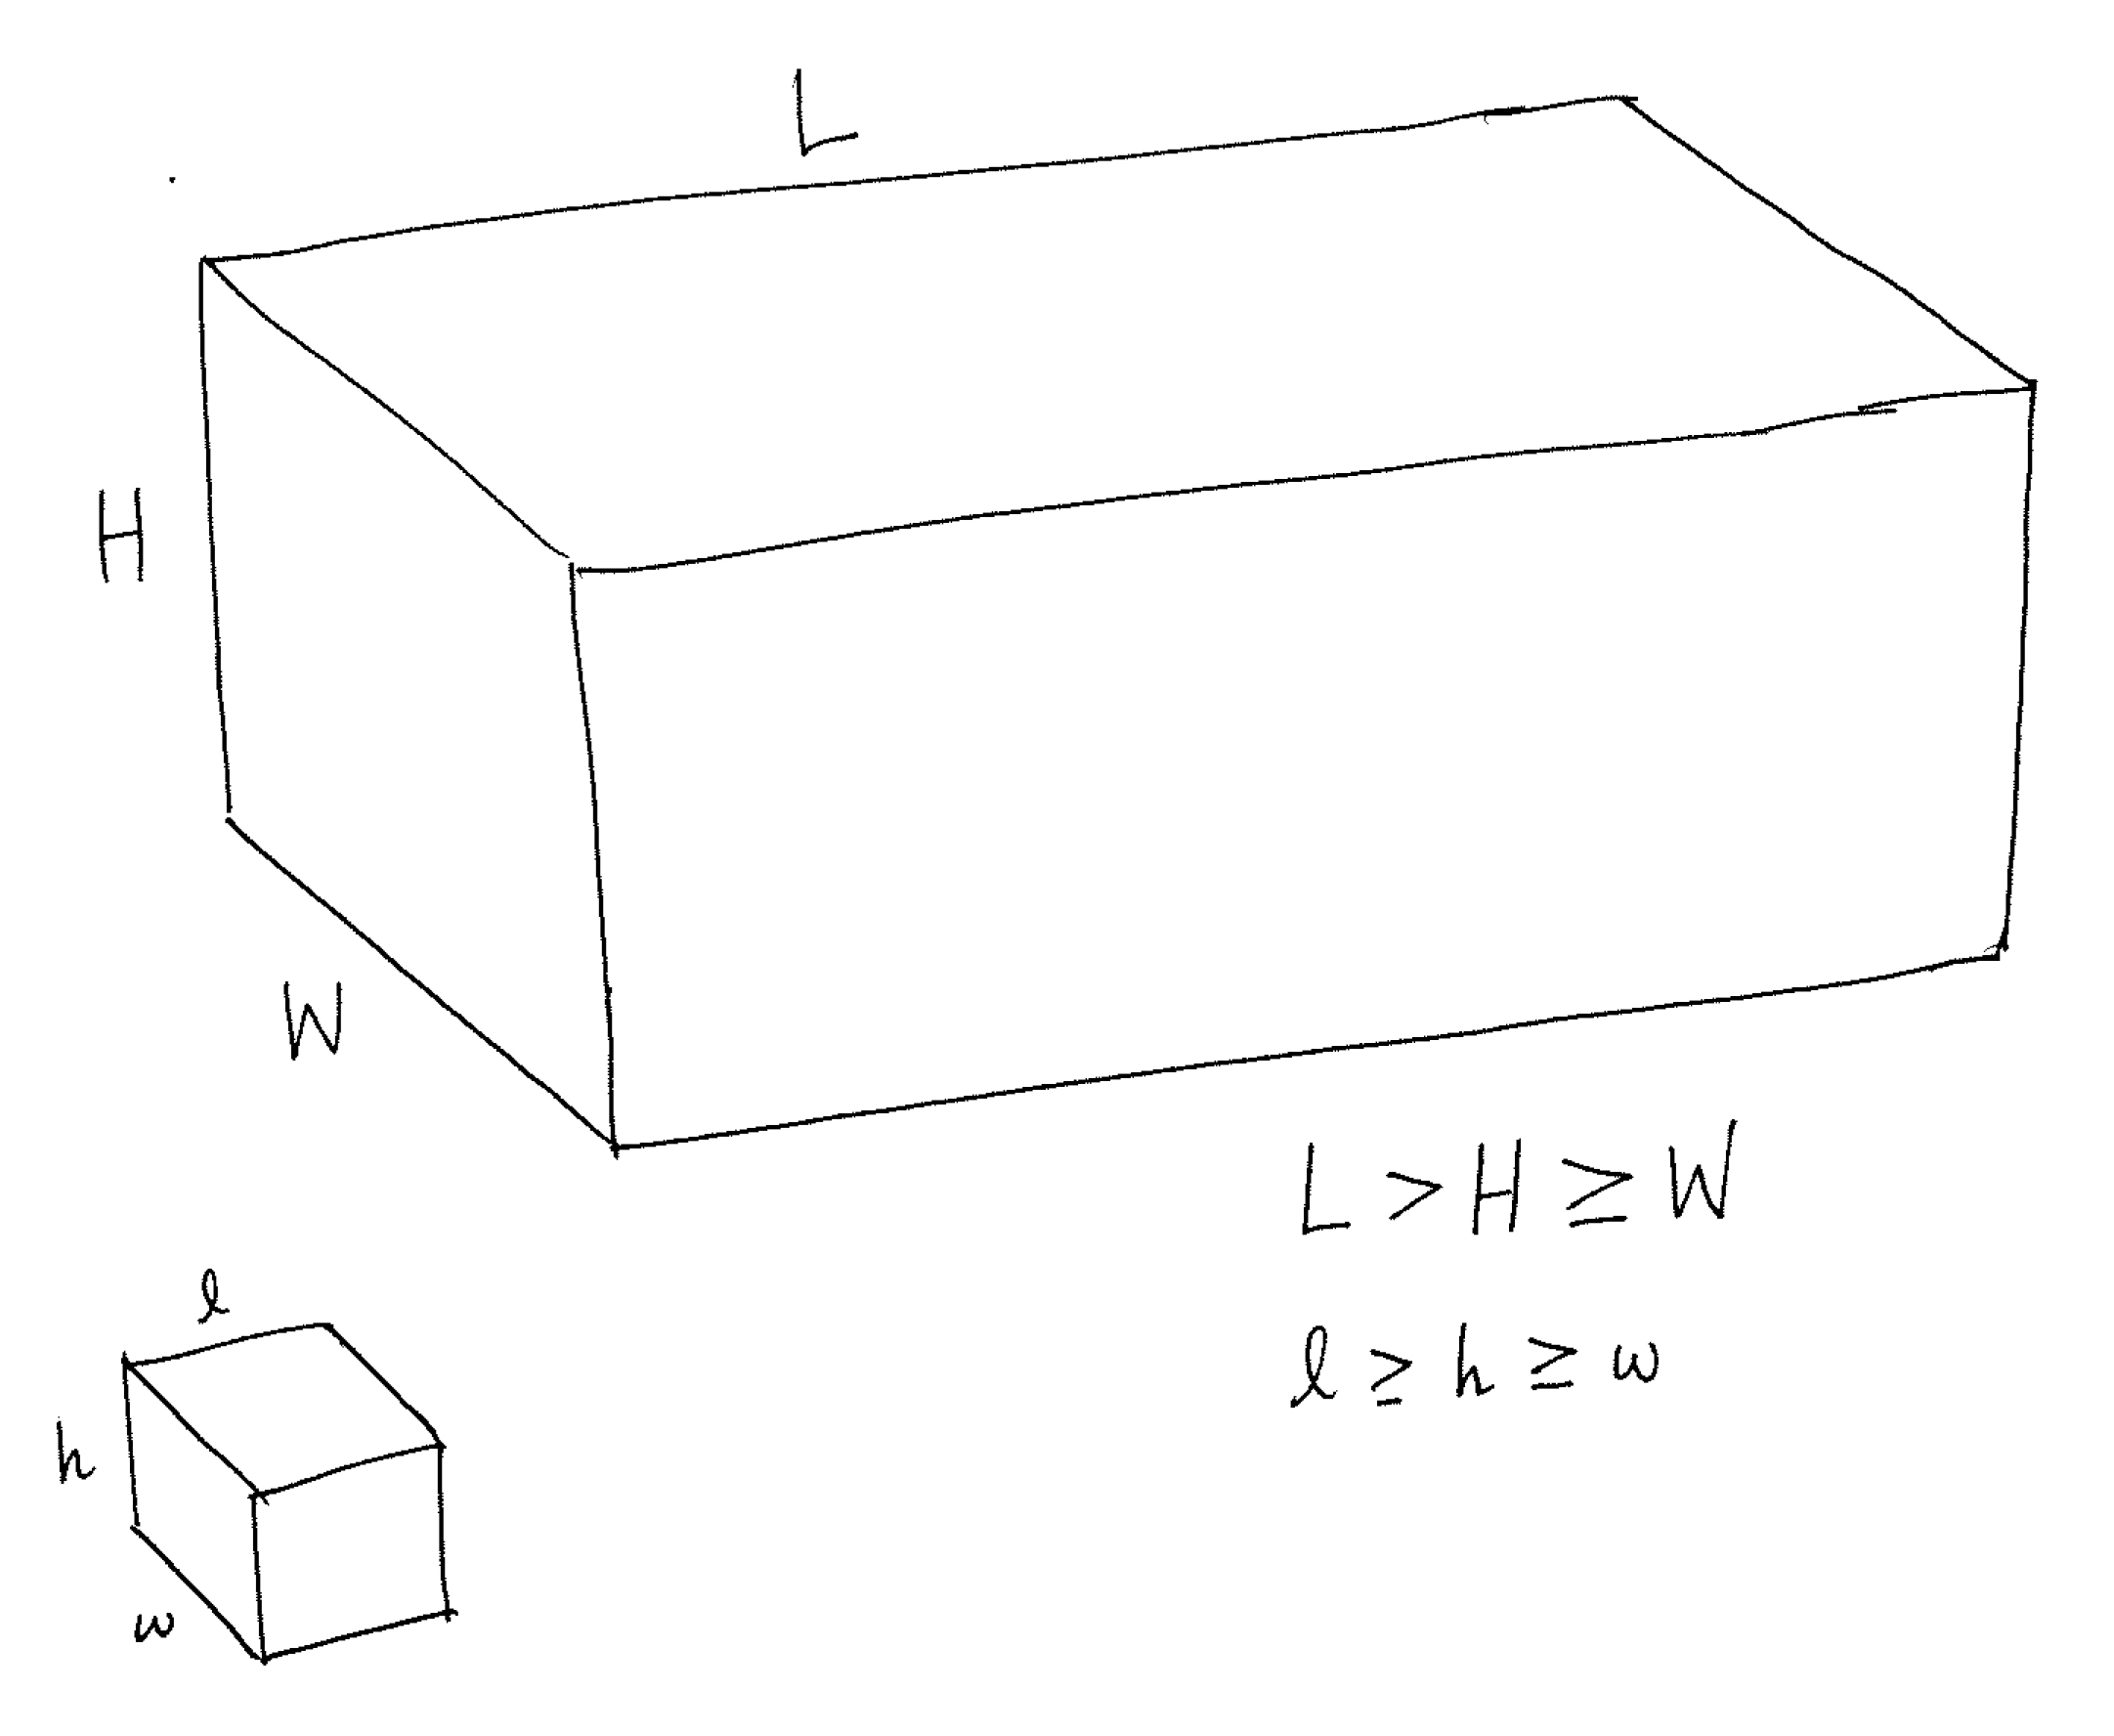

In [2]:
from IPython.display import Image
Image(filename='pic1.jpg')

### In order to determine an optimal arrangement efficiently, a modeling approah is adopted. We hypothesize two models of arrangement of cartons.

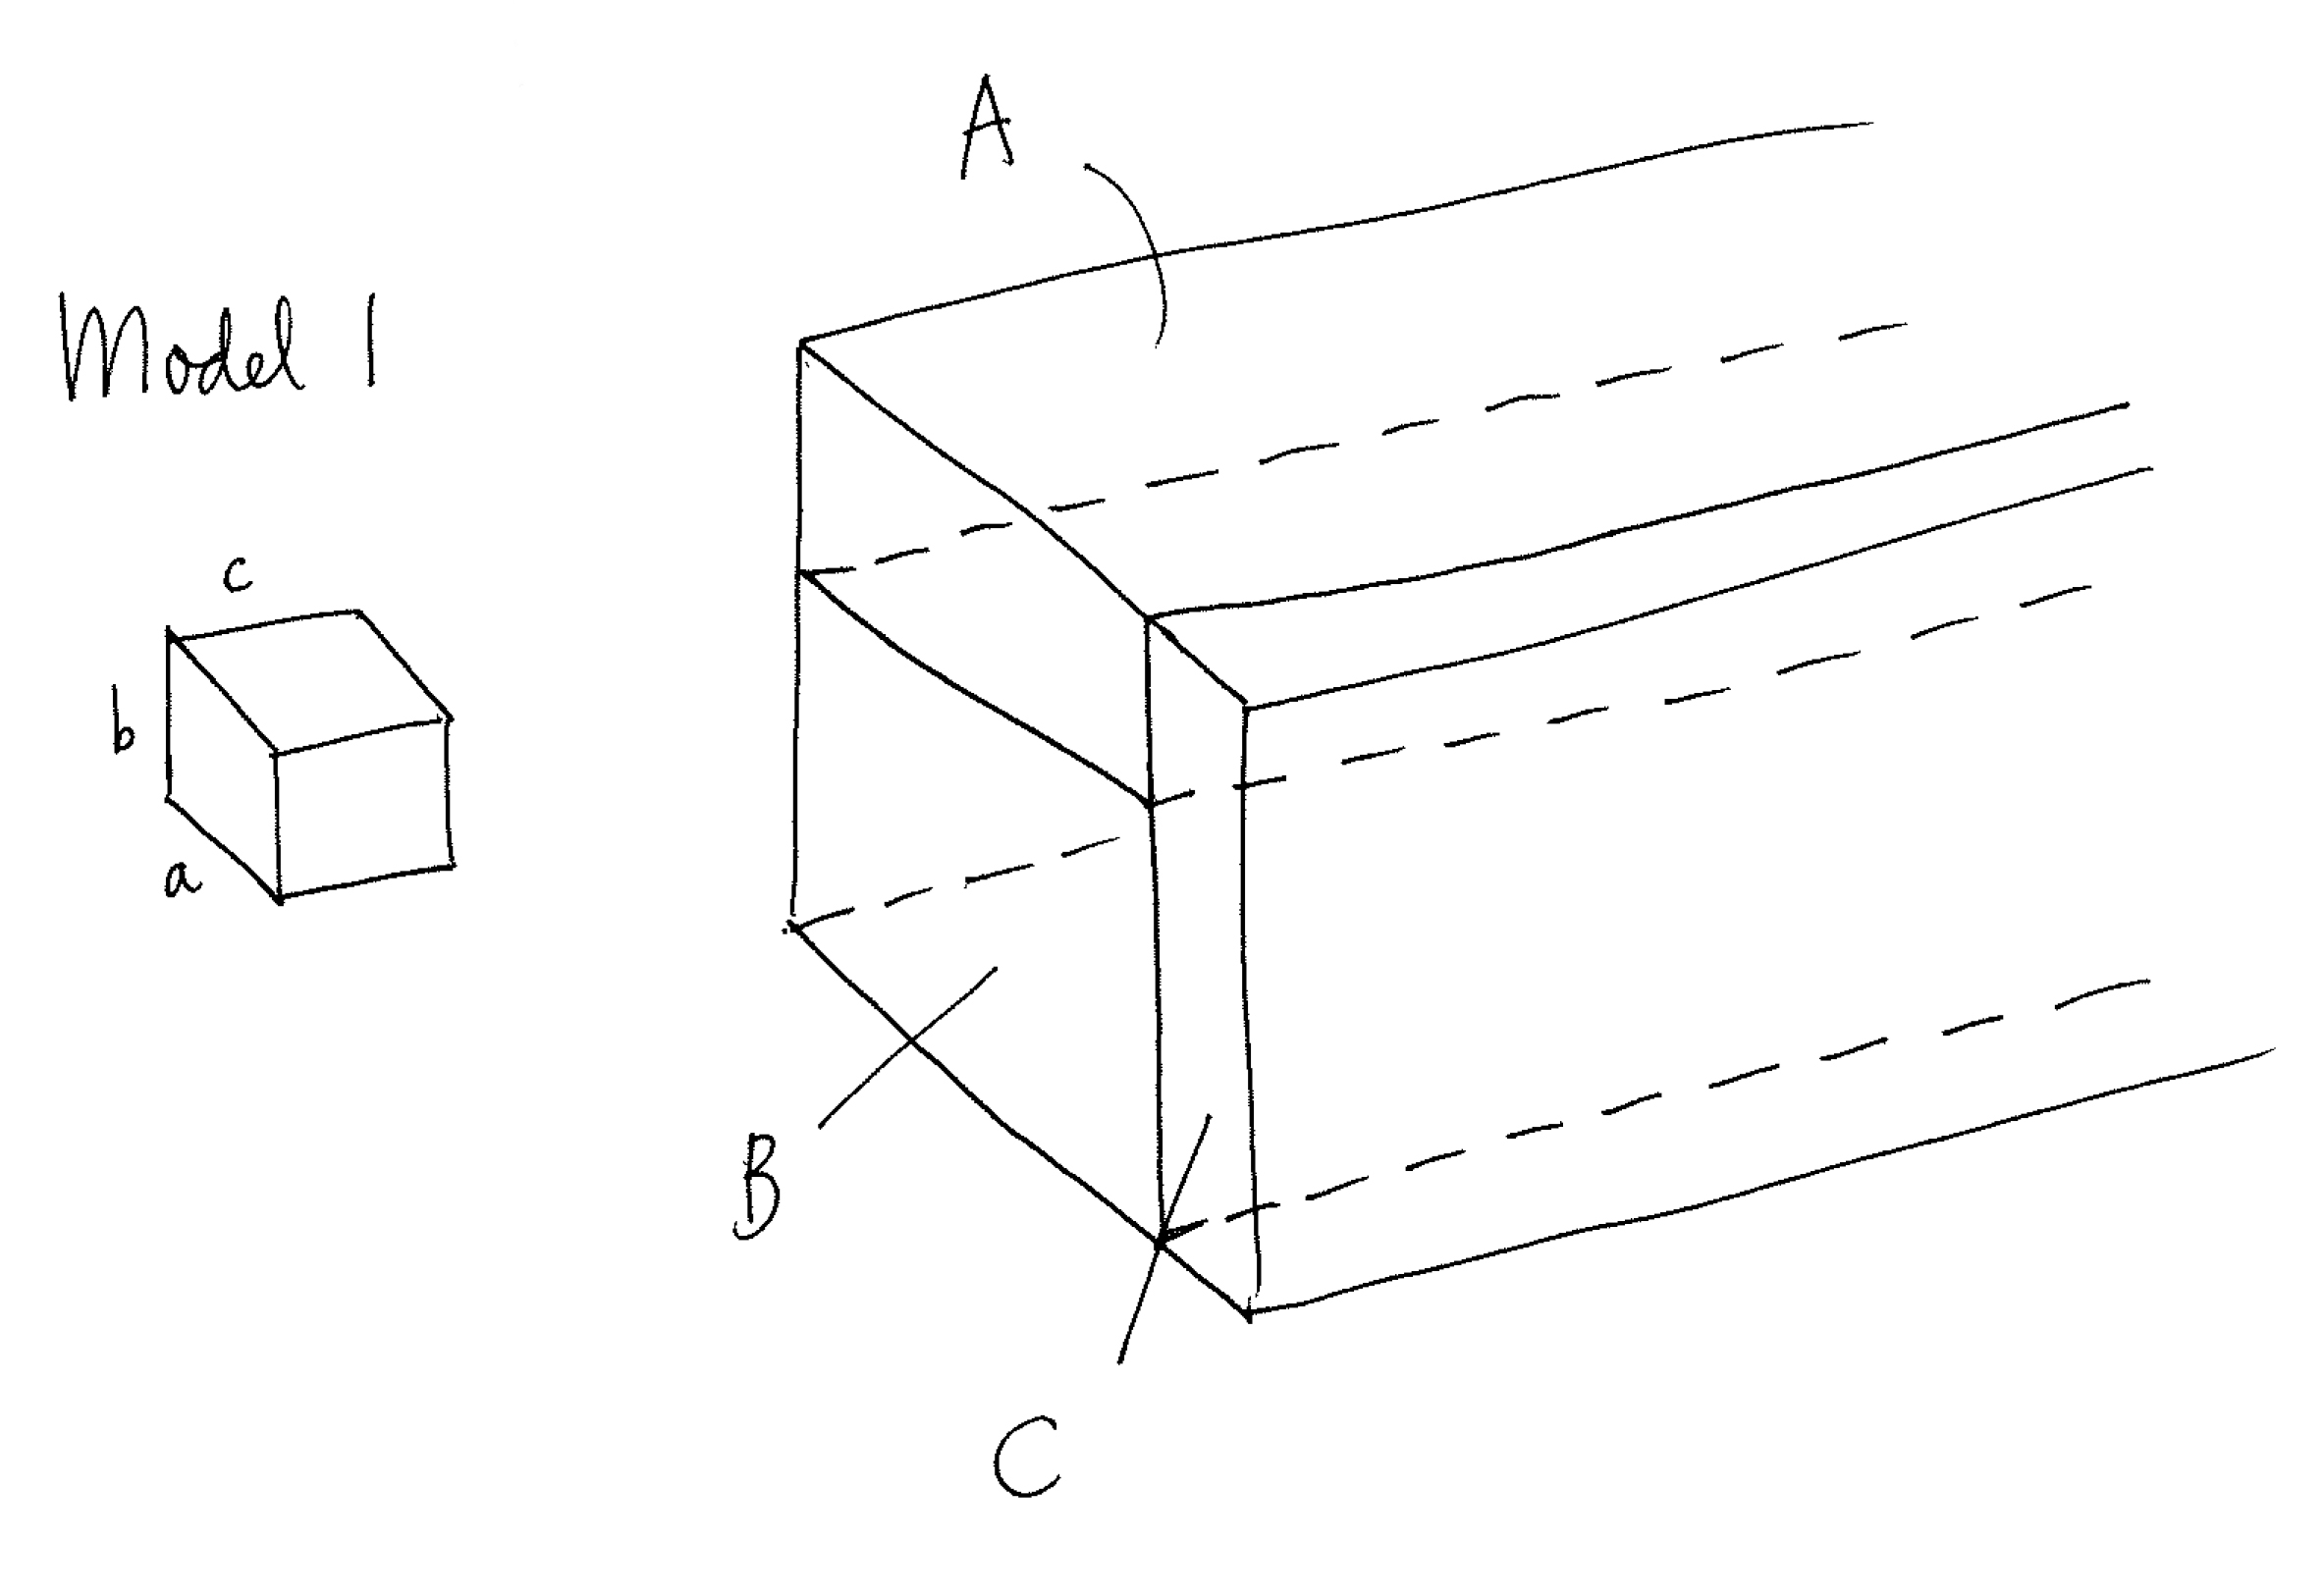

In [3]:
from IPython.display import Image
Image(filename='Model1.jpg')

### Let the arrangement in compartment A be $(a_{A},b_{A},c_{A})$. Suppose that the number of cartons along the three dimensions are $(n_{A},p_{A},m_{A})$ respectively. 

### Similarly, we can define $(a_{B},b_{B},c_{B})$ and $(n_{B},p_{B},m_{B})$ for compartment B and $(a_{C},b_{C},c_{C})$ and $(n_{C},p_{C},m_{C})$ for compartment C.

### Since volume of a carton is the same irrespective of the arrangement, we must have
$$V=a_{A}b_{A}c_{A}=a_{B}b_{B}c_{B}=a_{C}b_{C}c_{C},$$
### where $V$ is the volume of a carton.

### We also can formulate the following constraints:
$$n_{B}a_{B}+n_{C}a_{C} \le W$$
$$p_{B}b_{B}+p_{A}b_{A} \le H$$
$$n_{A}a_{A} \le n_{B}a_{B}$$
$$m_{B}c_{B} \le L$$
$$m_{A}c_{A} \le L$$
$$p_{C}b_{C} \le H$$
$$m_{C}c_{C} \le L$$

### Since the total number of cartons inside the container is given by $n_{A}p_{A}m_{A}+n_{B}p_{B}m_{B}+n_{C}p_{C}m_{C}$, our objective is to minimize the empty space inside the container which is
$$S=HWL - (n_{A}p_{A}m_{A}+n_{B}p_{B}m_{B}+n_{C}p_{C}m_{C})V$$

### Possible values of $n_{B}$ are $\text{int}(\frac{W}{a_{B}}),\text{int}(\frac{W}{a_{B}})-1,\ldots,1$
### Possible value of $n_{C}$ given $n_{B}$ is $\text{int}(\frac{W-n_{B}a_{B}}{a_{C}})$
### Possible values of $p_{B}$ are $\text{int}(\frac{H}{b_{B}}),\text{int}(\frac{H}{b_{B}})-1,\ldots,1$
### Possible value of $p_{A}$ given $p_{B}$ is $\text{int}(\frac{H-p_{B}b_{B}}{b_{A}})$
### Possible value of $n_{A}$ given $n_{B}$ is $\text{int}(\frac{n_{B}a_{B}}{a_{A}})$
### Possible value of $m_{B}$ is $\text{int}(\frac{L}{c_{B}})$
### Possible value of $m_{A}$ is $\text{int}(\frac{L}{c_{A}})$
### Possible value of $p_{C}$ is $\text{int}(\frac{H}{b_{C}})$
### Possible value of $m_{C}$ is $\text{int}(\frac{L}{c_{C}})$

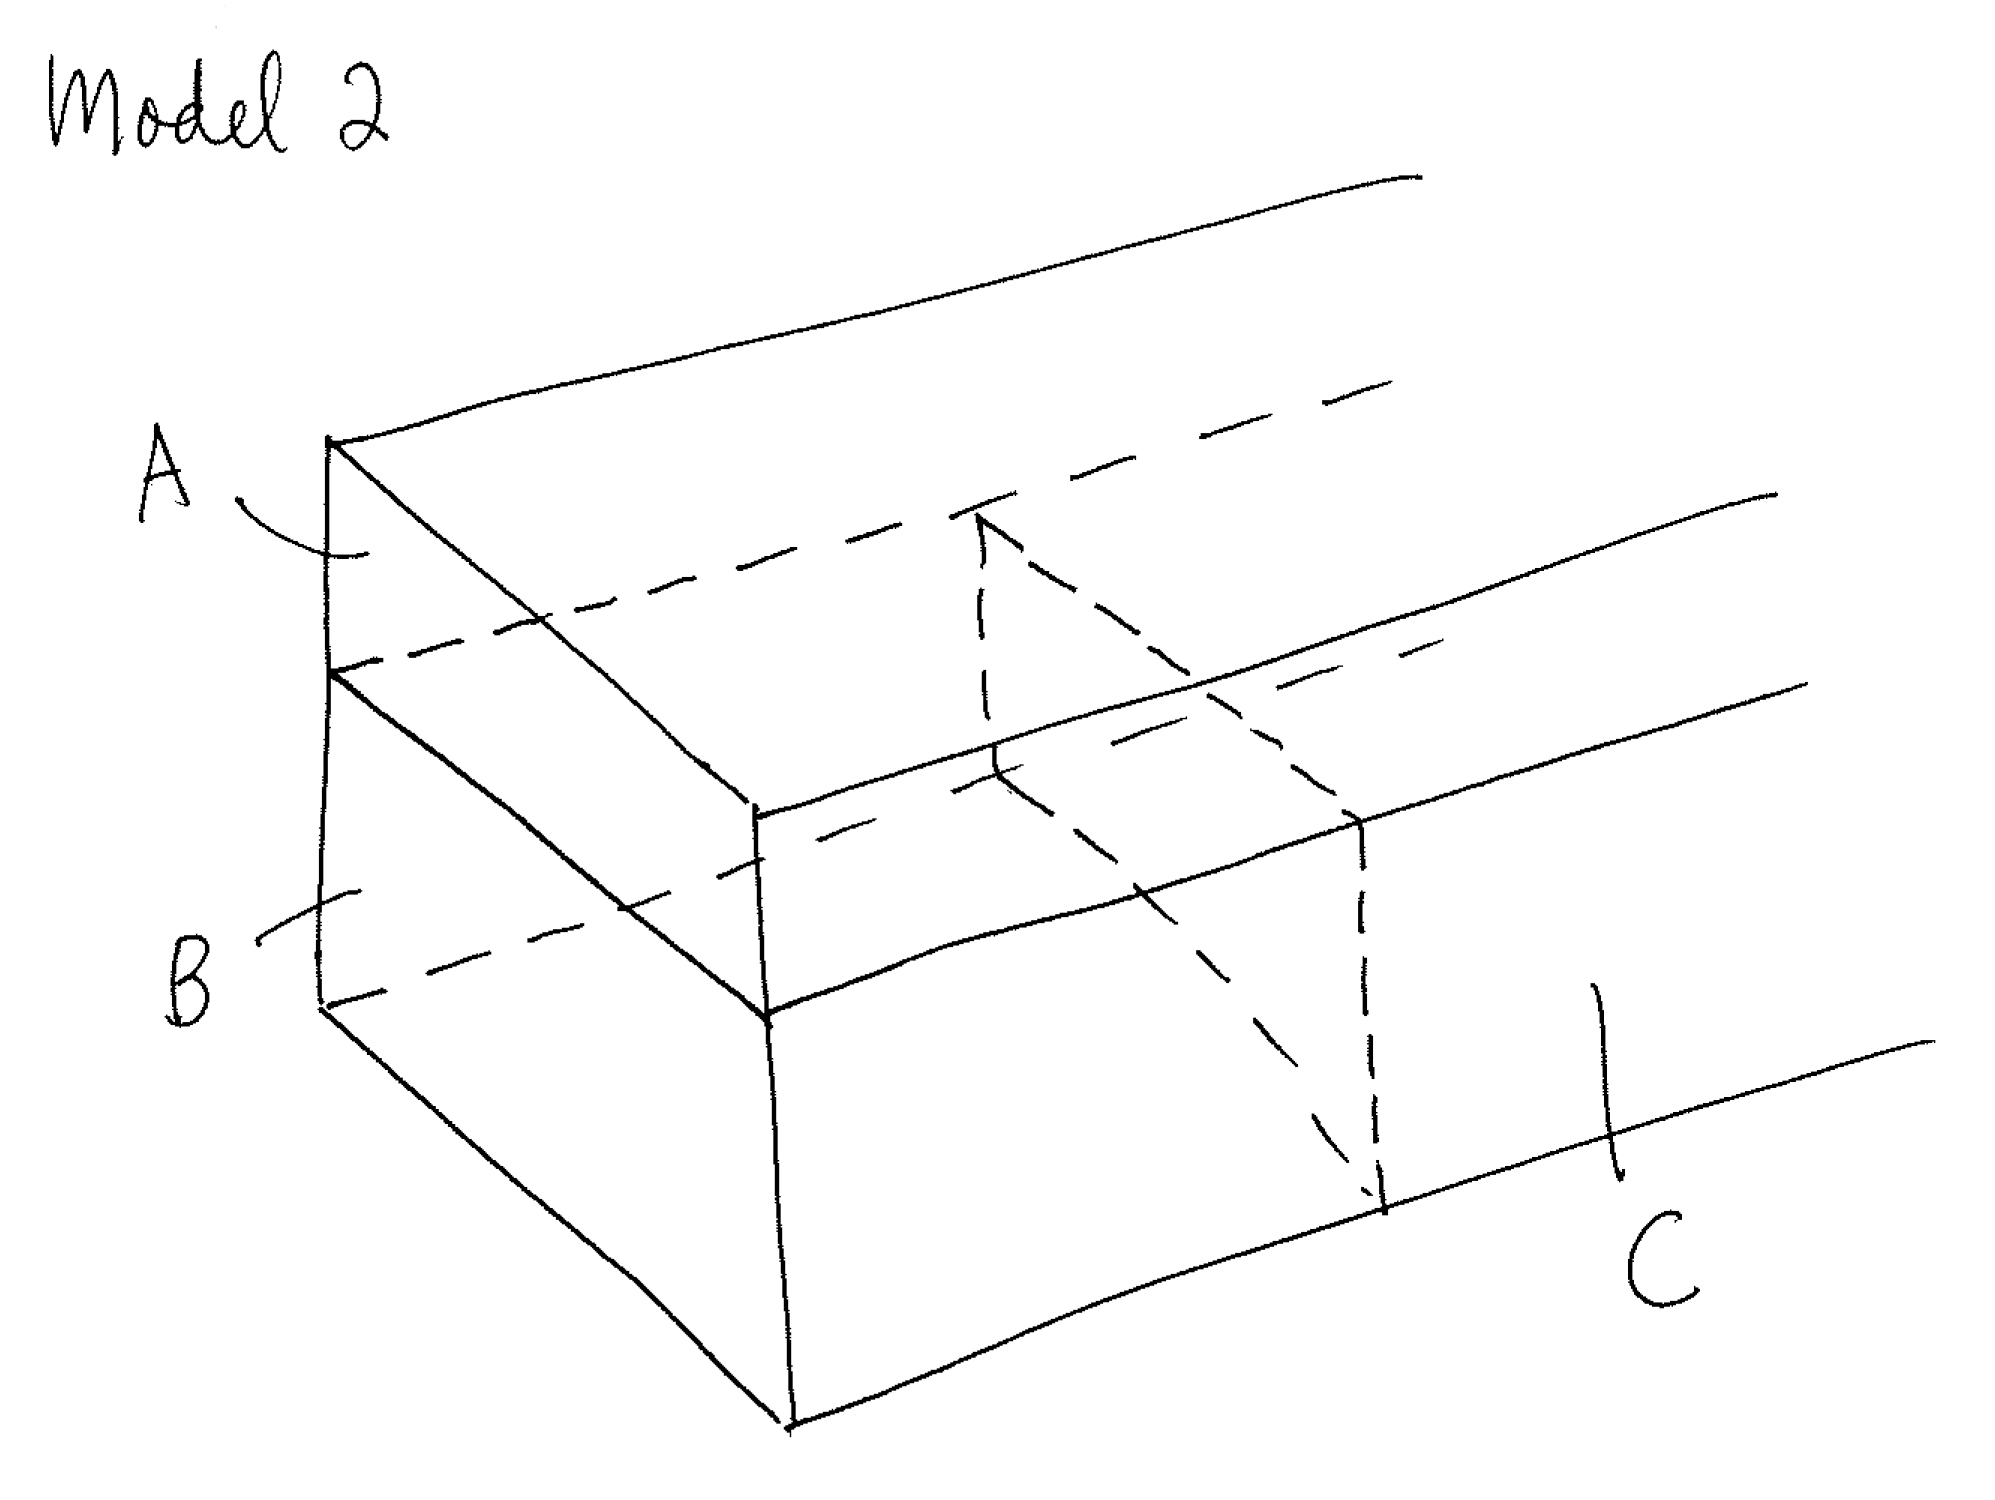

In [4]:
from IPython.display import Image
Image(filename='Model2.jpg')

### Similar to Model 1, we can define the same set of variables and formulate the following constraints:
$$n_{B}a_{B} \le W$$
$$n_{A}a_{A} \le W$$
$$p_{C}b_{C}+p_{A}b_{A} \le H$$
$$p_{B}b_{B} \le p_{C}b_{C}$$
$$m_{B}c_{B}+m_{C}c_{C} \le L$$
$$m_{A}c_{A} \le L$$
$$n_{C}a_{C} \le W$$

### Our objective is to minimize the empty space inside the container which is
$$S=HWL - (n_{A}p_{A}m_{A}+n_{B}p_{B}m_{B}+n_{C}p_{C}m_{C})V$$

### Possible values of $p_{C}$ are $\text{int}(\frac{H}{b_{C}}),\text{int}(\frac{H}{b_{C}})-1,\ldots,1$
### Possible value of $p_{A}$ given $p_{C}$ is $\text{int}(\frac{H-p_{C}b_{C}}{b_{A}})$
### Possible values of $m_{C}$ are $\text{int}(\frac{L}{c_{C}}),\text{int}(\frac{L}{c_{C}})-1,\ldots,1$
### Possible value of $m_{B}$ given $m_{C}$ is $\text{int}(\frac{L-m_{C}c_{C}}{c_{B}})$
### Possible value of $p_{B}$ given $p_{C}$ is $\text{int}(\frac{p_{C}b_{C}}{b_{B}})$
### Possible value of $m_{A}$ is $\text{int}(\frac{L}{c_{A}})$
### Possible value of $n_{C}$ is $\text{int}(\frac{W}{a_{C}})$
### Possible value of $n_{A}$ is $\text{int}(\frac{W}{a_{A}})$
### Possible value of $n_{B}$ is $\text{int}(\frac{W}{a_{B}})$

In [5]:
#define lists to contain available container dimensions
Containers = dict([('N40',(12.032,2.385,2.352)),('HQ40',(12.0,2.65,2.311)),('N45',(13.556,2.698,2.352)),('N20',(5.71,2.385,2.352))])

In [6]:
Containers['N40']

(12.032, 2.385, 2.352)

In [7]:
#define possible orientation of a carton
def orientation(l,w,h):
    return [(l,w,h),(w,h,l),(h,l,w),(l,h,w),(h,w,l),(w,l,h)]

In [8]:
orientation(0.508,0.381,0.457)

[(0.508, 0.381, 0.457),
 (0.381, 0.457, 0.508),
 (0.457, 0.508, 0.381),
 (0.508, 0.457, 0.381),
 (0.457, 0.381, 0.508),
 (0.381, 0.508, 0.457)]

In [9]:
import math
def create_comb(s):
    if s >= 36:
        a = math.floor(s/36)
        s = s-a*36
    else:
        a = 0
    if s >= 6:
        b = math.floor(s/6)
        s = s-b*6
    else:
        b = 0
    c = s
    return (a,b,c)

In [28]:
create_comb(106)

(2, 5, 4)

In [11]:
[orientation(0.508,0.381,0.457)[x] for x in create_comb(106)]

[(0.457, 0.508, 0.381), (0.381, 0.508, 0.457), (0.457, 0.381, 0.508)]

In [29]:
def create_layout(s,l,w,h):
    return [orientation(l,w,h)[x] for x in create_comb(s)] 

In [13]:
def prod(x,y):
    return x*y

In [14]:
create_layout(36,0.508,0.381,0.457)

[(0.381, 0.457, 0.508), (0.508, 0.381, 0.457), (0.508, 0.381, 0.457)]

In [15]:
def find_other_values_M1(nB,pB,L,H,W,A,B,C):
    aA,aB,aC = A
    bA,bB,bC = B
    cA,cB,cC = C
    nC = math.floor((W-nB*aB)/aC)
    pA = math.floor((H-pB*bB)/bA)
    nA = math.floor(nB*aB/aA)
    mB = math.floor(L/cB)
    mA = math.floor(L/cA)
    pC = math.floor(H/bC)
    mC = math.floor(L/cC)
    return ((nA,pA,mA),(nB,pB,mB),(nC,pC,mC))

In [16]:
from functools import reduce
def filled_ctn_M1(s,l,w,h,Type,Containers):
    L,H,W = Containers[Type]
    A,B,C = create_layout(s,l,w,h)
    aA,aB,aC = A
    bA,bB,bC = B
    cA,cB,cC = C
    max_fill = 0
    for nB in range(math.floor(W/aB),0,-1):
        for pB in range(math.floor(H/bB),0,-1):
            ctn_A,ctn_B,ctn_C = find_other_values_M1(nB,pB,L,H,W,A,B,C)
            ctn_filled = reduce(prod,ctn_A) + reduce(prod,ctn_B) + reduce(prod,ctn_C)
            if ctn_filled > max_fill:
                max_fill = ctn_filled
                max_nB = nB
                max_pB = pB
                mctn_A = ctn_A
                mctn_B = ctn_B
                mctn_C = ctn_C
    return (max_fill,1,mctn_A,mctn_B,mctn_C)

In [17]:
filled_ctn_M1(105,0.508,0.381,0.457,'N40',Containers)

(744, 1, (1, 2, 23), (1, 3, 26), (4, 5, 31))

In [18]:
def find_other_values_M2(pC,mC,L,H,W,A,B,C):
    aA,aB,aC = A
    bA,bB,bC = B
    cA,cB,cC = C
    pA = math.floor((H-pC*bC)/bA)
    mB = math.floor((L-mC*cC)/cB)
    pB = math.floor(pC*bC/bB)
    mA = math.floor(L/cA)
    nC = math.floor(W/aC)
    nA = math.floor(W/aA)
    nB = math.floor(W/aB)
    return ((nA,pA,mA),(nB,pB,mB),(nC,pC,mC))

In [19]:
list(range(math.floor(2.5/0.35),0,-1))

[7, 6, 5, 4, 3, 2, 1]

In [20]:
def filled_ctn_M2(s,l,w,h,Type,Containers):
    L,H,W = Containers[Type]
    A,B,C = create_layout(s,l,w,h)
    aA,aB,aC = A
    bA,bB,bC = B
    cA,cB,cC = C
    max_fill = 0
    for pC in range(math.floor(H/bC),0,-1):
        for mC in range(math.floor(L/cC),0,-1):
            ctn_A,ctn_B,ctn_C = find_other_values_M2(pC,mC,L,H,W,A,B,C)
            ctn_filled = reduce(prod,ctn_A) + reduce(prod,ctn_B) + reduce(prod,ctn_C)
            if ctn_filled > max_fill:
                max_fill = ctn_filled
                max_pC = pC
                max_mC = mC
                mctn_A = ctn_A
                mctn_B = ctn_B
                mctn_C = ctn_C
    return (max_fill,2,mctn_A,mctn_B,mctn_C)

In [21]:
filled_ctn_M2(16,0.508,0.381,0.457,'N40',Containers)

(750, 2, (4, 0, 26), (6, 4, 30), (5, 6, 1))

In [22]:
def optimal_fill(l,w,h,Type,Containers):
    for s in range(216):
        mf1 = filled_ctn_M1(s,l,w,h,Type,Containers)
        mf2 = filled_ctn_M2(s,l,w,h,Type,Containers)
        if s==0:
            if mf1[0] > mf2[0]:
                mf = mf1
            else:
                mf = mf2
        else:
            if mf1[0] > mf2[0]:
                if mf1[0] > mf[0]:
                    mf = mf1
            else:
                if mf2[0] > mf[0]:
                    mf = mf2
    return mf

In [23]:
optimal_fill(0.508,0.381,0.457,'N40',Containers)

(1116, 1, (4, 0, 23), (6, 6, 31), (0, 5, 26))

In [24]:
optimal_fill(0.508,0.381,0.457,'HQ40',Containers)

(1116, 1, (4, 0, 23), (6, 6, 31), (0, 5, 26))

In [150]:
optimal_fill(0.508,0.381,0.457,'N45',Containers)

(1470, 1, (4, 0, 26), (6, 7, 35), (0, 5, 29))

In [25]:
optimal_fill(0.508,0.381,0.457,'N20',Containers)

(504, 1, (4, 0, 11), (6, 6, 14), (0, 5, 12))

In [26]:
optimal_fill(0.5,0.5,0.5,'HQ40',Containers)

(480, 2, (4, 0, 24), (4, 5, 0), (4, 5, 24))

In [27]:
filled_ctn_M2(0,0.5,0.5,0.5,'HQ40',Containers)

(480, 2, (4, 0, 24), (4, 5, 0), (4, 5, 24))